In [64]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, make_scorer, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

# Expand display options
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_colwidth", None)  # Do not truncate column text
pd.set_option("display.expand_frame_repr", False)  # Avoid line wrapping

In [65]:
# Correcting relative path by going one level up
file_path = os.path.join(os.getcwd(), "..", "DataSet", "healthinsurance.csv")

# Normalize path (useful for cross-platform compatibility)
file_path = os.path.normpath(file_path)

# Check if file exists
if os.path.exists(file_path):
    print("File found")
    df = pd.read_csv(file_path)
else:
    print("File not found!")


File found


In [66]:
#display sample of 15
df.sample(15)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
1000,43.0,female,79,46.2,Diabetes,0,1,NewYork,110,1,0,Dancer,45863.2
8147,44.0,male,64,31.4,Alzheimer,1,1,Rochester,80,1,0,CEO,39556.5
1954,32.0,male,54,24.0,NoDisease,1,1,Orlando,73,0,1,DataScientist,12842.5
1527,41.0,female,49,31.6,NoDisease,1,0,NewYork,70,0,0,Singer,7358.2
2200,41.0,male,73,21.8,NoDisease,1,0,Nashville,92,0,0,DefencePersonnels,6272.5
14963,34.0,female,55,37.3,NoDisease,2,0,Brimingham,64,1,0,Manager,5989.5
12539,42.0,male,56,37.2,NoDisease,2,0,Reno,74,1,0,Analyst,7162.0
5285,63.0,female,72,26.2,NoDisease,0,0,Nashville,86,1,1,HouseKeeper,14256.2
9826,51.0,female,69,25.8,NoDisease,1,0,Pittsburg,74,1,0,Manager,9861.0
14010,18.0,female,53,21.7,NoDisease,0,1,Brimingham,54,1,0,Actor,14283.5


In [67]:
#get data types
print(df.dtypes)

# for each float give me the range of values
print(df.describe())




age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object
                age        weight           bmi  no_of_dependents        smoker  bloodpressure      diabetes    regular_ex         claim
count  14604.000000  15000.000000  14044.000000      15000.000000  15000.000000   15000.000000  15000.000000  15000.000000  15000.000000
mean      39.547521     64.909600     30.266413          1.129733      0.198133      68.650133      0.777000      0.224133  13401.437620
std       14.015966     13.701935      6.122950          1.228469      0.398606      19.418515      0.416272      0.417024  12148.239619
min       18.000000     34.000000  

In [68]:
# Amount of rows with missing data
missing_data = df.isnull().sum()

print(missing_data)

# Drop rows with missing data
df = df.dropna()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64


In [69]:
# create sub dataset without hereditary_diseases, city and job_title
df2 = df.drop(columns=['hereditary_diseases', 'city', 'job_title'])

# print every binary column:
for column in df2.columns:
    if df2[column].nunique() == 2:
        print(column) 

#Convert sex to binary
df2['sex'] = df2['sex'].astype('category').cat.codes

print(df.sample(2))
print(df2.sample(2))




sex
smoker
diabetes
regular_ex
       age     sex  weight   bmi hereditary_diseases  no_of_dependents  smoker        city  bloodpressure  diabetes  regular_ex   job_title    claim
4162  42.0    male      54  26.1           NoDisease                 2       0  Brimingham             64         0           0  Politician   7729.7
4232  18.0  female      87  36.9           Alzheimer                 0       1     Raleigh             74         1           0     Student  36149.5
        age  sex  weight   bmi  no_of_dependents  smoker  bloodpressure  diabetes  regular_ex    claim
12019  48.0    1      59  35.6                 4       0             66         1           0  10736.9
9450   24.0    0      50  22.6                 0       0             74         1           0   2457.5


In [70]:
# Real Life Comparison: Is the data set balanced?
print(df2.mean())

#get weight for man and weight female
print(df.groupby('sex')['weight'].mean())


age                    39.586533
sex                     0.487104
weight                 64.689478
bmi                    30.287295
no_of_dependents        1.106462
smoker                  0.198124
bloodpressure          68.628737
diabetes                0.783118
regular_ex              0.223110
claim               13416.465050
dtype: float64
sex
female    62.506143
male      66.988418
Name: weight, dtype: float64


## Real Life Comparison: 

### Cont. Variables:
Age: 38.6 

Weight Male: 89.7 kg

Weight Female: 77.4 kg 

BMI: 29 

Bloodpressure: 70-80 

claim: 14,570

### Cat. Variables
Sex: 50.5% male 

Smoker: 11.6% 

Diabetes: 11.6%

Reg. exercise: 24.2%




#Idea: Diabetes seems very odd so reduce the bootstrapp the data to get a more correct distribution.

In [71]:
import pandas as pd

# Separate the dataset into two groups
diabetes_df = df[df['diabetes'] == 1]
non_diabetes_df = df[df['diabetes'] == 0]

# Determine the maximum possible dataset size while maintaining approximately 11% diabetes cases.
# That is, we require that diabetes_samples = int(total_samples * 0.11) does not exceed len(diabetes_df) 
# and non_diabetes_samples = total_samples - diabetes_samples does not exceed len(non_diabetes_df).
max_total_samples = int(min(len(diabetes_df) / 0.11, len(non_diabetes_df) / 0.89, len(df)))
diabetes_samples = int(max_total_samples * (1-0.783118))
non_diabetes_samples = max_total_samples - diabetes_samples

# Randomly sample without replacement
diabetes_sampled = diabetes_df.sample(n=diabetes_samples, replace=False, random_state=42)
non_diabetes_sampled = non_diabetes_df.sample(n=non_diabetes_samples, replace=False, random_state=42)

# Combine the sampled groups
bootstrapped_df = pd.concat([diabetes_sampled, non_diabetes_sampled])

# Shuffle the new dataset
bootstrapped_df = bootstrapped_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the proportion of diabetes cases
print(f"Final dataset size: {len(bootstrapped_df)}")

#display new dataset numeric columns mean
print(bootstrapped_df.mean(numeric_only=True))



Final dataset size: 3325
age                    38.102556
weight                 64.748872
bmi                    29.525594
no_of_dependents        0.995188
smoker                  0.166015
bloodpressure          68.534737
diabetes                0.216842
regular_ex              0.220150
claim               11168.865173
dtype: float64


## Comment: Smoking is a bit too much otherwise it seems reasonable. However claim reduced by 3000.

In [72]:
#label encode the new dataset
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Encode the categorical columns
categorical_columns =  bootstrapped_df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    bootstrapped_df[column] = le.fit_transform(bootstrapped_df[column])

In [73]:
#Train Test Split

from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = bootstrapped_df.drop(columns=['claim'])
y = bootstrapped_df['claim']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Define the model directly (no pipeline needed)
rf = RandomForestRegressor(random_state=42, n_jobs=1)  # Enable parallel tree training

# Expanded parameter grid with corrected max_features values
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1]  
}

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)  # Minimize error

# Set up the RandomizedSearchCV
random_search2 = RandomizedSearchCV(
    estimator=rf,       # Directly use the RandomForestRegressor
    param_distributions=param_dist,
    n_iter=200,         # Number of parameter settings sampled
    cv=5,              # 5-fold cross-validation
    n_jobs=18,         # Use all available cores for parallel search
    random_state=42,   # For reproducibility
    verbose=3,         # Show intermediate progress
    scoring=mape_scorer,
)

# Fit RandomizedSearchCV on the training data
random_search2.fit(X_train, y_train)

# Predictions on the training set
y_train_pred2 = random_search2.best_estimator_.predict(X_train)
r2_train2 = r2_score(y_train, y_train_pred2)
mape_train2 = mean_absolute_percentage_error(y_train, y_train_pred2) * 100  

# Predictions on the test set
y_test_pred2 = random_search2.best_estimator_.predict(X_test)
r2_test2 = r2_score(y_test, y_test_pred2)
mape_test2 = mean_absolute_percentage_error(y_test, y_test_pred2) * 100  # Convert to percentage

# Print results
print("Best parameters found:", random_search2.best_params_)
print("Best cross-validation score:", random_search2.best_score_)
print("Train set R² score:", r2_train2)
print(f"Train set MAPE: {mape_train2:.2f}%")
print("Test set R² score:", r2_test2)
print(f"Test set MAPE: {mape_test2:.2f}%")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters found: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_features': 0.5, 'max_depth': None, 'ccp_alpha': 0.0, 'bootstrap': False}
Best cross-validation score: -0.1472578663355192
Train set R² score: 1.0
Train set MAPE: 0.00%
Test set R² score: 0.847540121097109
Test set MAPE: 14.84%


In [75]:
# Get Top 10 parameters and scores
results = pd.DataFrame(random_search.cv_results_)
results = results.sort_values(by='rank_test_score')
results = results[['params', 'mean_test_score', 'std_test_score']]
print(results.head(10))

                                                                                                                                                                                params  mean_test_score  std_test_score
26    {'tree_method': 'hist', 'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0.05, 'n_estimators': 300, 'max_depth': 13, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.9}        -0.159142        0.015186
9    {'tree_method': 'hist', 'subsample': 1.0, 'reg_lambda': 5, 'reg_alpha': 0.05, 'n_estimators': 700, 'max_depth': 12, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.9}        -0.160531        0.020296
28   {'tree_method': 'hist', 'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0.05, 'n_estimators': 300, 'max_depth': 12, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.9}        -0.161300        0.018170
2     {'tree_method': 'hist', 'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 15, 'learning_rate'

## Comment: Performed worsens a lot, this is during losing most of the data points.


Generating PDP for feature: age


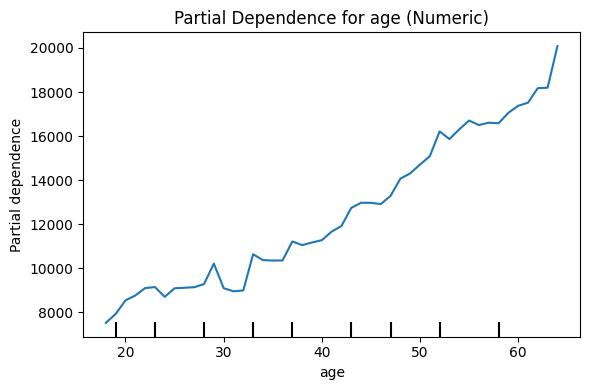


Generating PDP for feature: sex


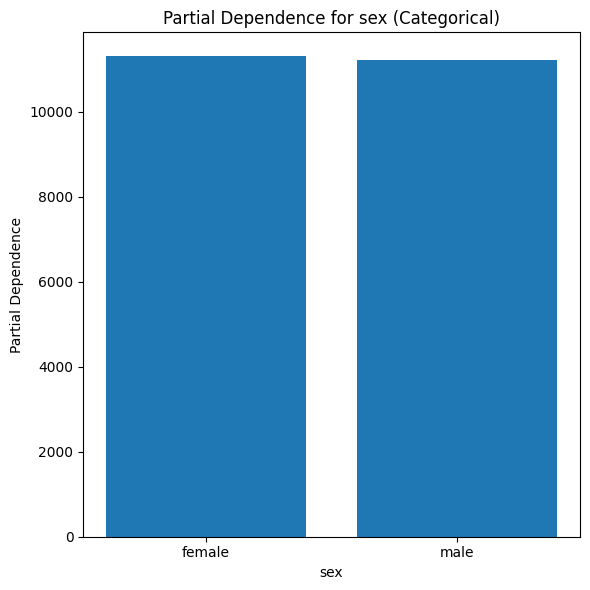


Generating PDP for feature: weight


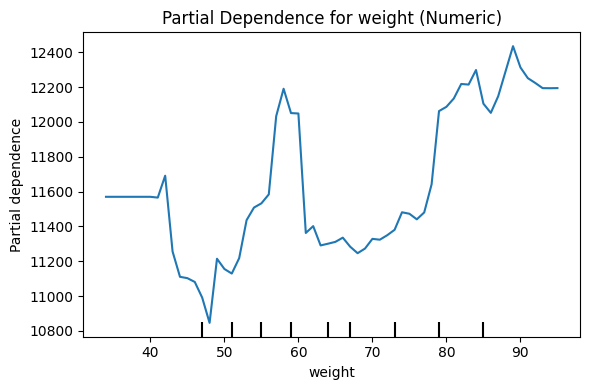


Generating PDP for feature: bmi


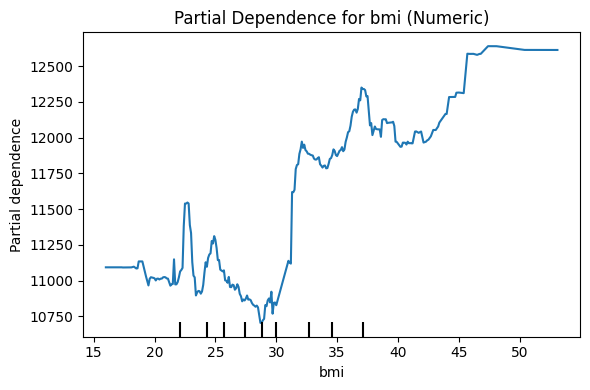


Generating PDP for feature: hereditary_diseases


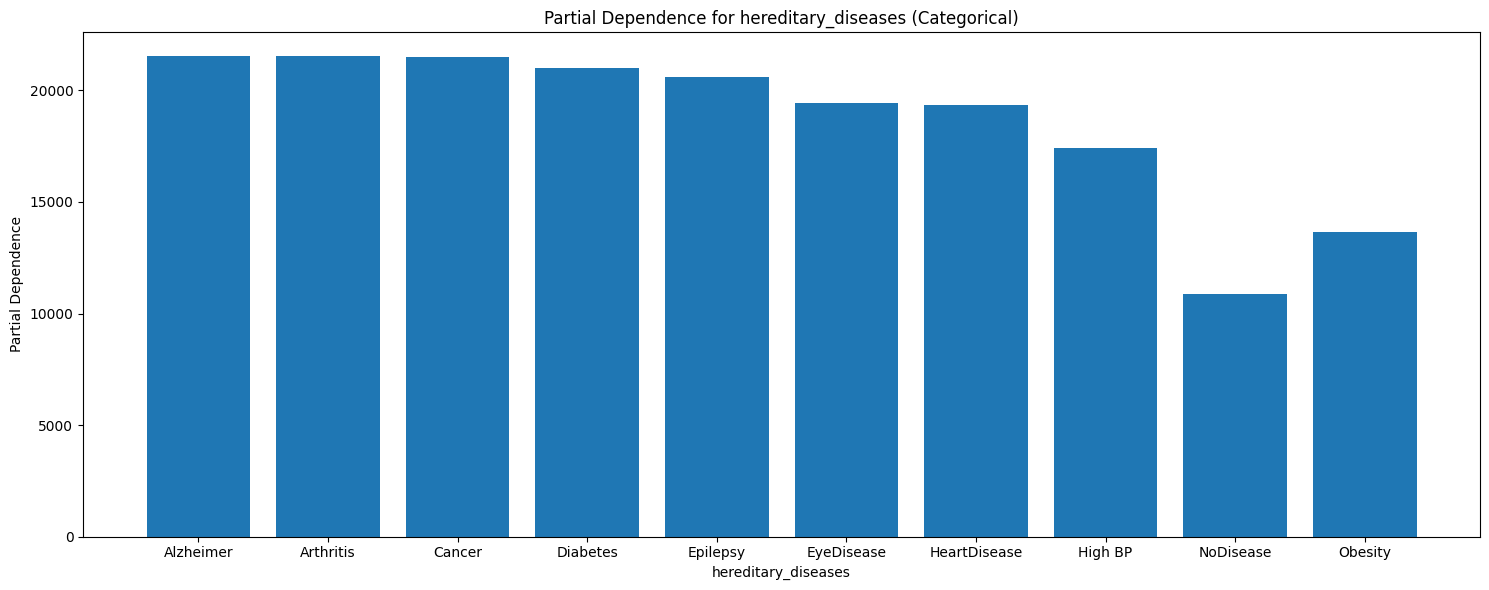


Generating PDP for feature: no_of_dependents


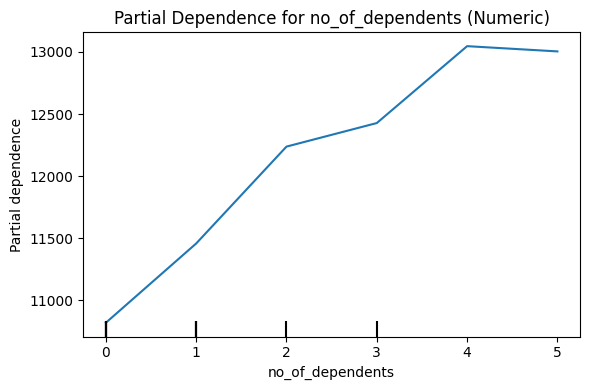


Generating PDP for feature: smoker


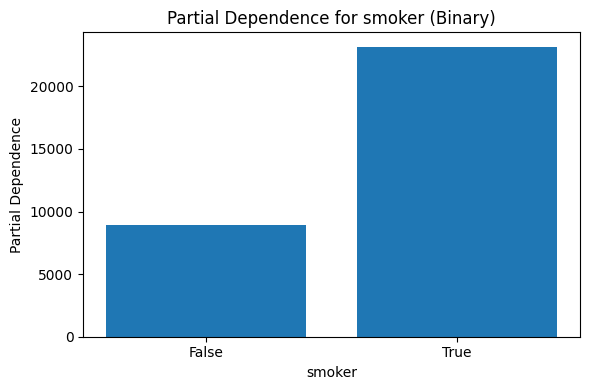


Generating PDP for feature: city


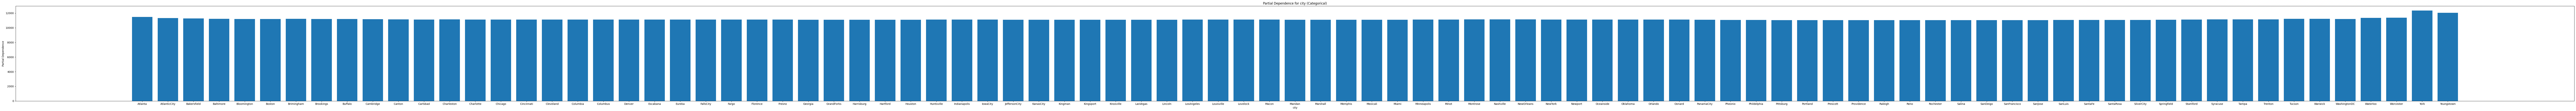


Generating PDP for feature: bloodpressure


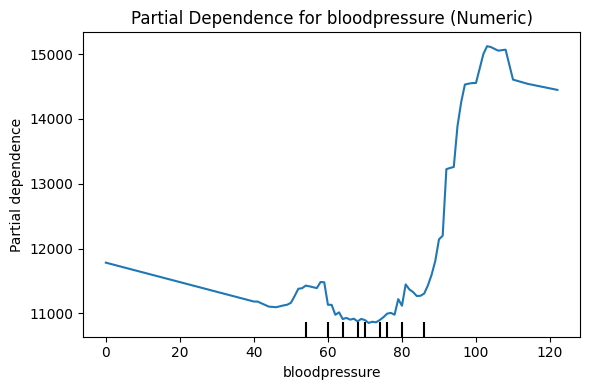


Generating PDP for feature: diabetes


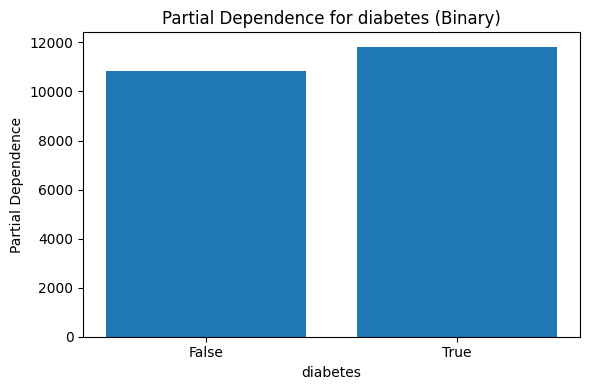


Generating PDP for feature: regular_ex


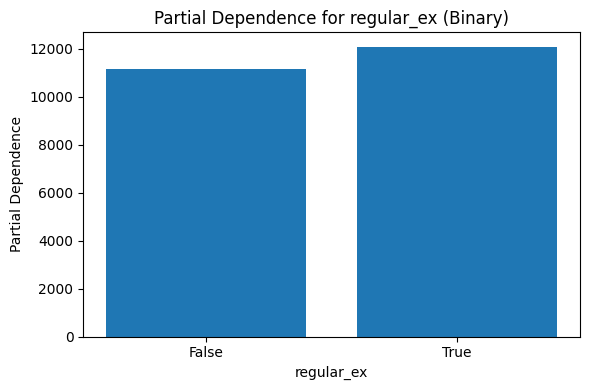


Generating PDP for feature: job_title


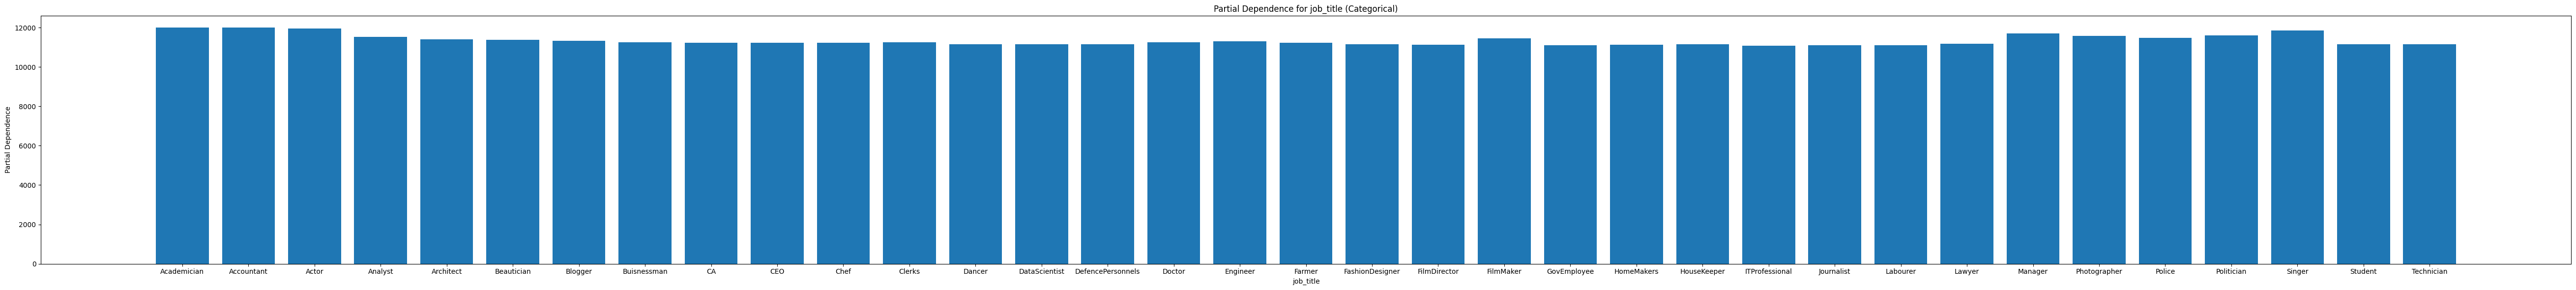

In [79]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
import pickle

# Define categorical and binary features
categorical_features = ['hereditary_diseases', 'city', 'job_title', 'sex']
binary_features = ['smoker', 'regular_ex', 'diabetes']  # Features that should be displayed as True/False

# Load encoders for categorical features
with open('../Models/encoder_dict.pkl', 'rb') as file:
    encoder_dict = pickle.load(file)

# Loop over each feature in X
for feature in X.columns:
    print(f"\nGenerating PDP for feature: {feature}")
    
    if feature in categorical_features:
        # ---------------------------------------------------------
        # CATEGORICAL FEATURE: Create a BAR CHART using its own encoder
        # ---------------------------------------------------------
        encoder = encoder_dict[feature]
        mapping = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
        
        pdp_result = partial_dependence(
            estimator=random_search2,
            X=X,
            features=[feature],
            kind='average',
            grid_resolution=13640
        )
        
        grid = pdp_result.get('values', [sorted(X[feature].unique())])[0]
        pdp_vals = pdp_result['average'][0]
        
        original_labels = [mapping.get(val, val) for val in grid]
        
        num_cats = len(original_labels)
        fig_width = max(6, num_cats * 1.5)
        plt.figure(figsize=(fig_width, 6))
        
        plt.bar(range(num_cats), pdp_vals, tick_label=original_labels)
        plt.title(f"Partial Dependence for {feature} (Categorical)")
        plt.xlabel(feature)
        plt.ylabel("Partial Dependence")
        plt.tight_layout()
        plt.show()
    
    elif feature in binary_features:
        # ---------------------------------------------------------
        # BINARY FEATURE: Map 0/1 to True/False in bar chart
        # ---------------------------------------------------------
        pdp_result = partial_dependence(
            estimator=random_search2,
            X=X,
            features=[feature],
            kind='average',
            grid_resolution=13640
        )
        
        grid = [False, True]  # Explicitly define binary values
        pdp_vals = pdp_result['average'][0]
        
        plt.figure(figsize=(6, 4))
        plt.bar([0, 1], pdp_vals, tick_label=grid)
        plt.title(f"Partial Dependence for {feature} (Binary)")
        plt.xlabel(feature)
        plt.ylabel("Partial Dependence")
        plt.tight_layout()
        plt.show()
        
    else:
        # ---------------------------------------------------------
        # NUMERIC FEATURE: Use PartialDependenceDisplay (line chart)
        # ---------------------------------------------------------
        fig, ax = plt.subplots(figsize=(6, 4))
        disp = PartialDependenceDisplay.from_estimator(
            estimator=random_search2,
            X=X,
            features=[feature],
            kind='average',
            ax=ax,
            grid_resolution=13640
        )
        plt.title(f"Partial Dependence for {feature} (Numeric)")
        plt.tight_layout()
        plt.show()

C:\Users\kobra\AppData\Local\Temp\ipykernel_3396\2842950027.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


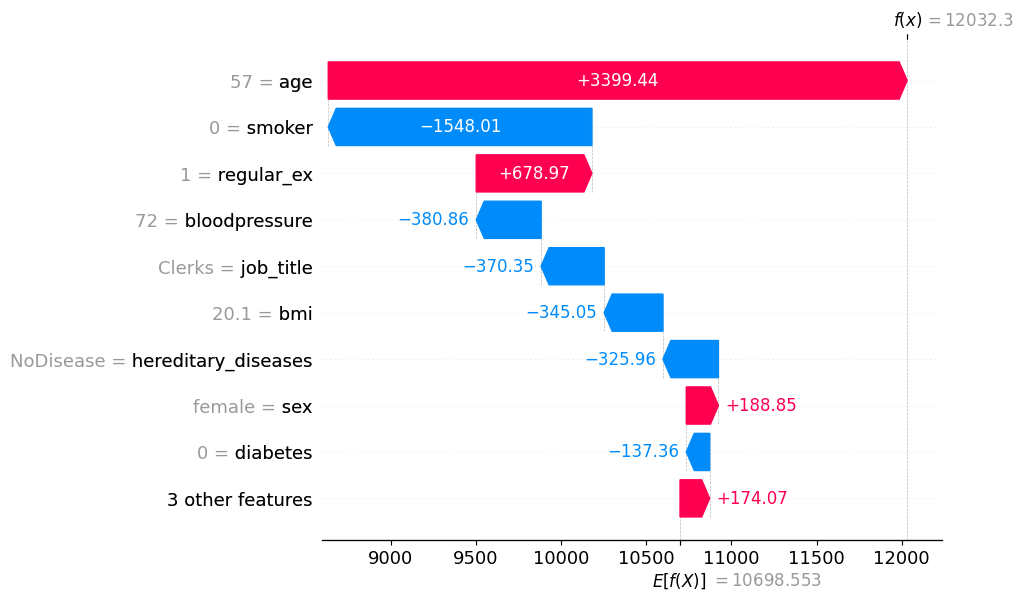

C:\Users\kobra\AppData\Local\Temp\ipykernel_3396\2842950027.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


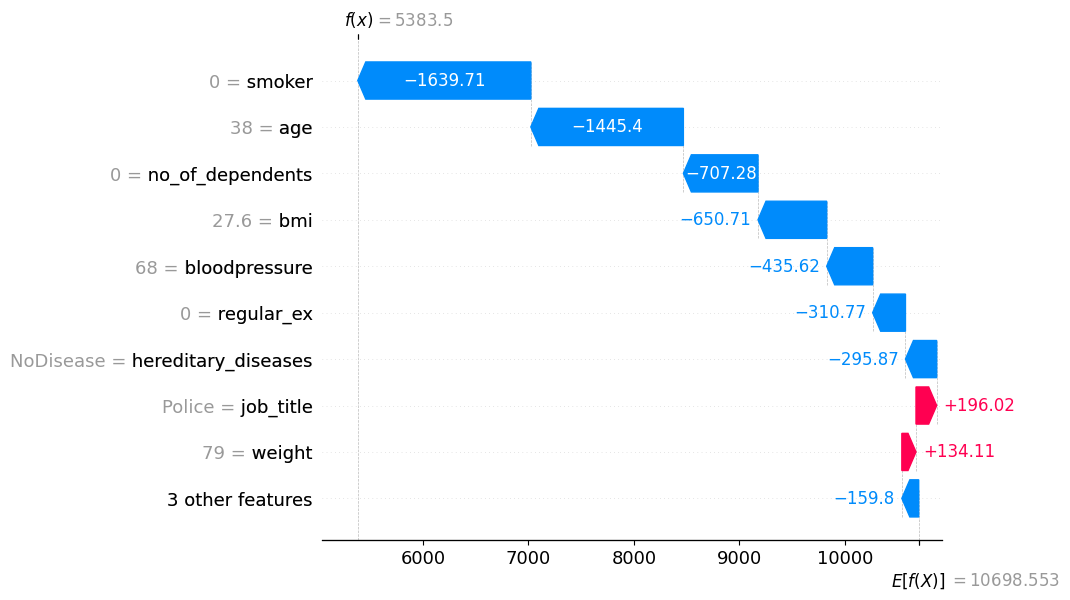

C:\Users\kobra\AppData\Local\Temp\ipykernel_3396\2842950027.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


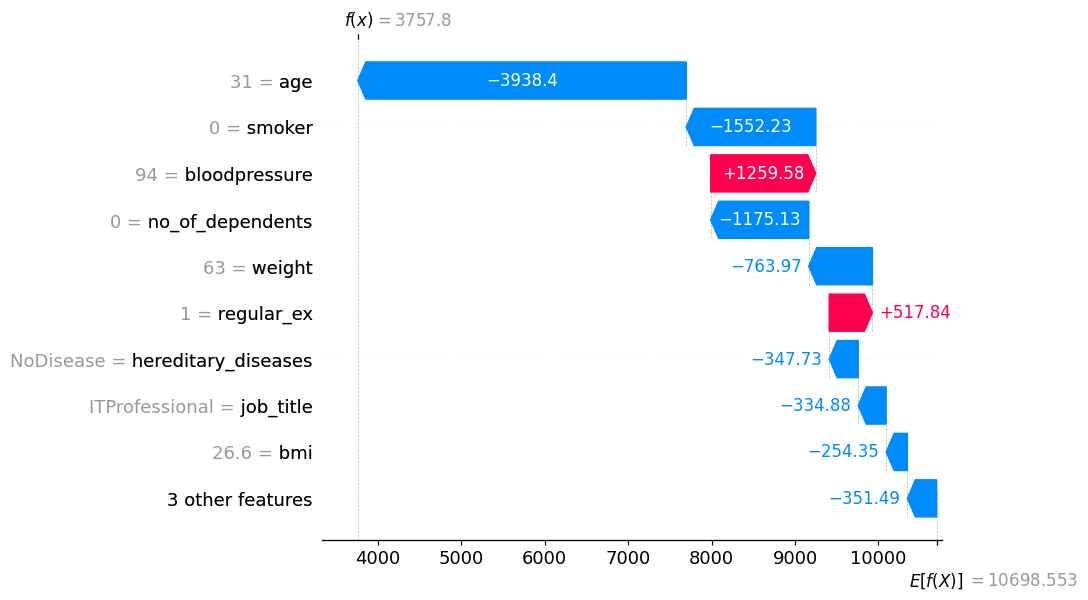

C:\Users\kobra\AppData\Local\Temp\ipykernel_3396\2842950027.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


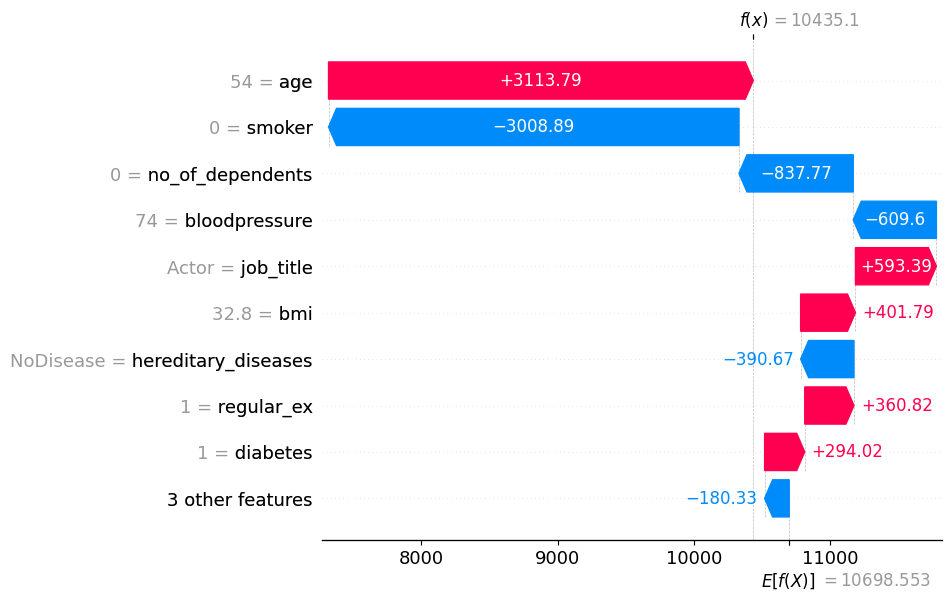

C:\Users\kobra\AppData\Local\Temp\ipykernel_3396\2842950027.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


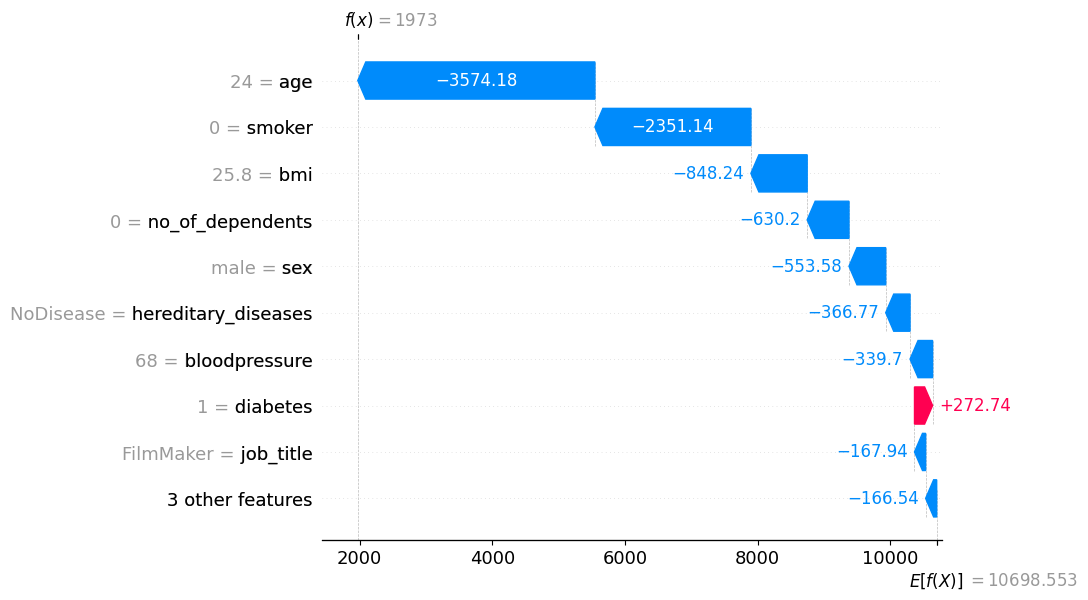

C:\Users\kobra\AppData\Local\Temp\ipykernel_3396\2842950027.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Epilepsy' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


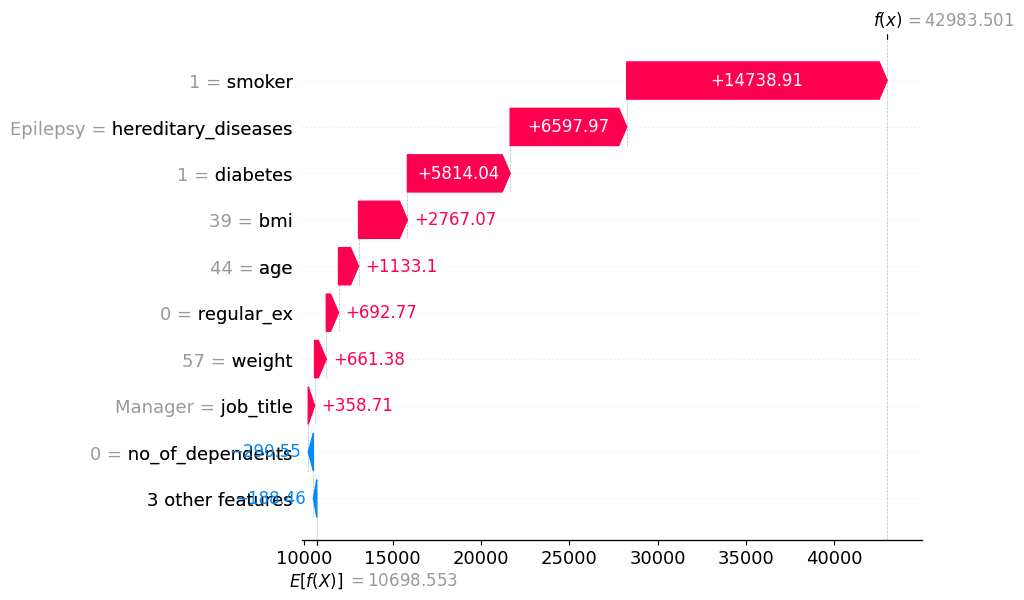

C:\Users\kobra\AppData\Local\Temp\ipykernel_3396\2842950027.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


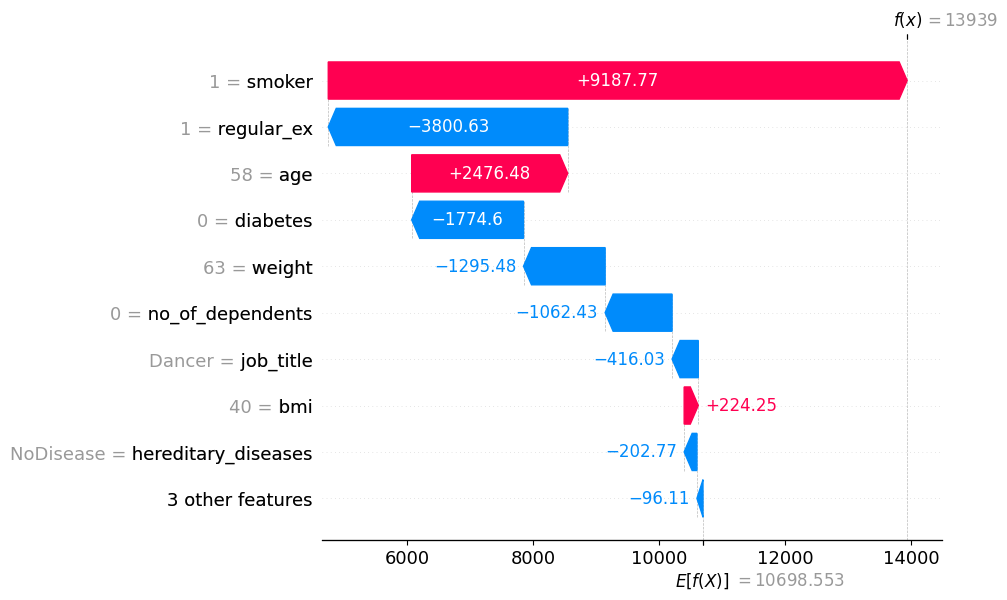

C:\Users\kobra\AppData\Local\Temp\ipykernel_3396\2842950027.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


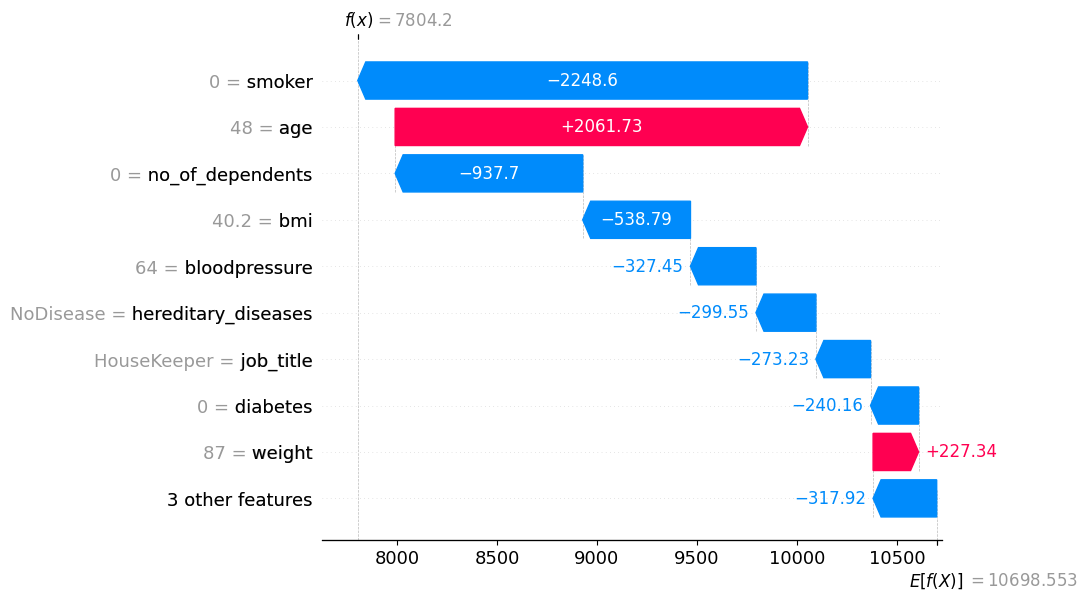

C:\Users\kobra\AppData\Local\Temp\ipykernel_3396\2842950027.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


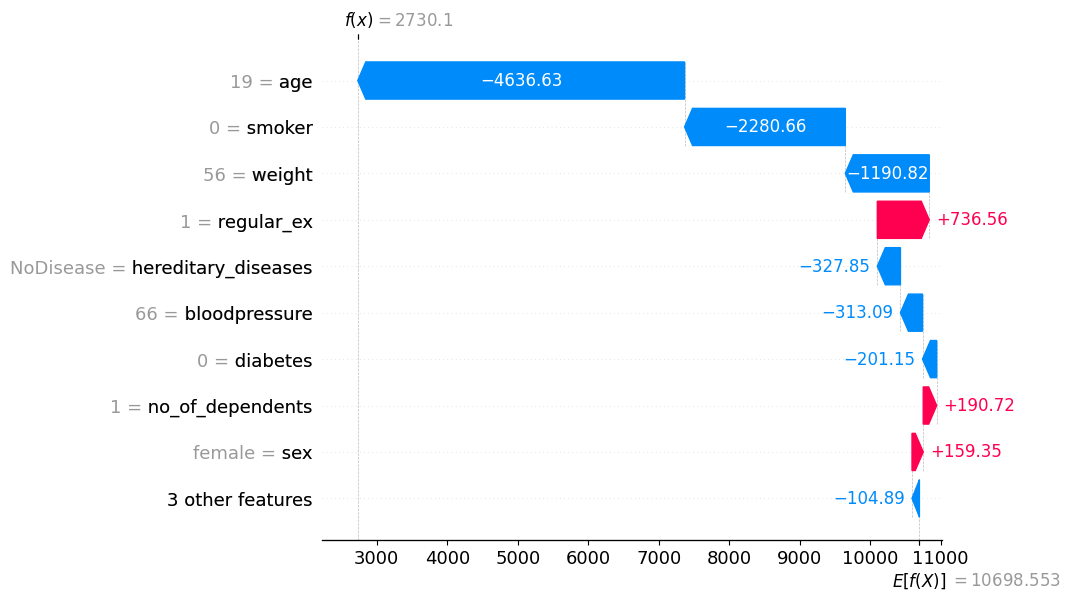

C:\Users\kobra\AppData\Local\Temp\ipykernel_3396\2842950027.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


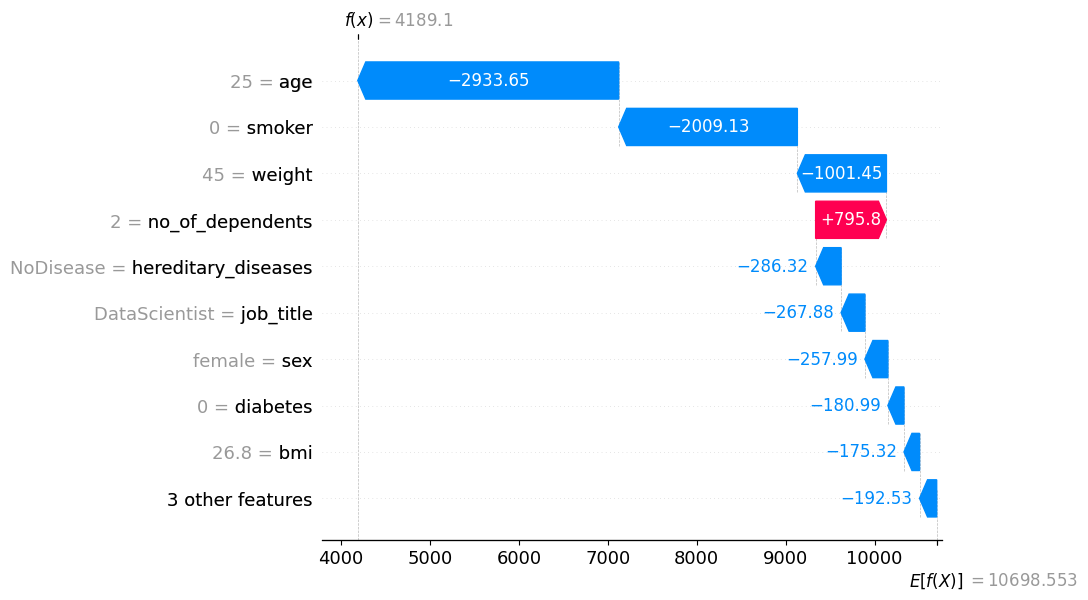

In [82]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Assume 'X' is your DataFrame with encoded categorical features
# Assume 'model' is your trained model
# Assume 'encoder_dict' is a dictionary of your LabelEncoders for each categorical feature

# Define categorical and binary features
categorical_features = ['hereditary_diseases', 'city', 'job_title', 'sex']
binary_features = ['smoker', 'regular_ex', 'diabetes']

# Initialize SHAP explainer with the best estimator from RandomizedSearchCV and numeric data
explainer = shap.Explainer(random_search2.best_estimator_, X)

# Select 10 random rows from X
random_indices = np.random.choice(X.index, size=10, replace=False)
X_sample = X.loc[random_indices]

# Compute SHAP values
shap_values = explainer(X_sample)

# Function to map encoded values back to original labels
def map_encoded_to_labels(value, encoder):
    inverse_mapping = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
    return inverse_mapping.get(value, value)  # Direct lookup for single values

# Generate SHAP plots for each row ensuring correct feature names
for i in range(10):
    # Create a copy of the row to modify for display
    row = X_sample.iloc[i].copy()
    
    # Map encoded values back to original labels for categorical and binary features
    for feature in categorical_features + binary_features:
        if feature in row.index and feature in encoder_dict:
            encoder = encoder_dict[feature]
            row[feature] = map_encoded_to_labels(row[feature], encoder)

    # Create SHAP values object with original labels
    shap_values_display = shap.Explanation(
        values=shap_values.values[i],
        base_values=shap_values.base_values[i],
        data=row,
        feature_names=row.index
    )

    # Generate SHAP waterfall plot with correctly labeled features
    shap.waterfall_plot(shap_values_display)

#Diabetes seems still quite off, therefore we get the followimg conclusion:

This data is not very reliable and it should not be used in a professionel setting.

Insurance companies should give scientists access to data and their should be more collaboration between the two parties to avoid biases.